In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def star_plot(x: str, y: str, hue: str, data: pd.DataFrame) -> None:
    df = data[[x, y, hue]]

    categories = list(df[x].unique())
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    hues = df[hue].unique()
    for h in hues:
        values_df = df[df[hue] == h]
        means_df = values_df.groupby([x, hue]).agg("mean")
        values = means_df["score"].tolist()
        values += values[:1]
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, linewidth=2, label=h)
        ax.legend()

    # Step 6: Customize the chart
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

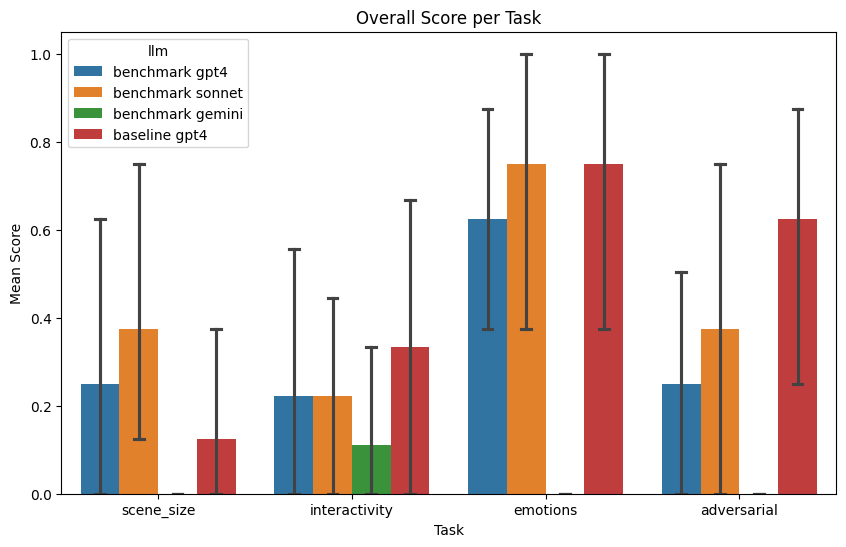

In [4]:
# Assuming results_df is already defined
score_df = None
for run_type in ["benchmark", "baseline"]:
    for llm_id in ["gpt4", "sonnet", "llama", "gemini"]:
        try:
            results_df = pd.read_csv(f"results/{run_type}_results_{llm_id}.csv")
            results_df["llm"] = f"{run_type} {llm_id}"
        except FileNotFoundError:
            continue

        if score_df is None:
            score_df = results_df
        else:
            score_df = pd.concat([score_df, results_df])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="task", y="score", hue="llm", data=score_df, capsize=0.2)
plt.title("Overall Score per Task")
plt.xlabel("Task")
plt.ylabel("Mean Score")
plt.show()


Text(0.5, 1.0, 'Overall Score per Task')

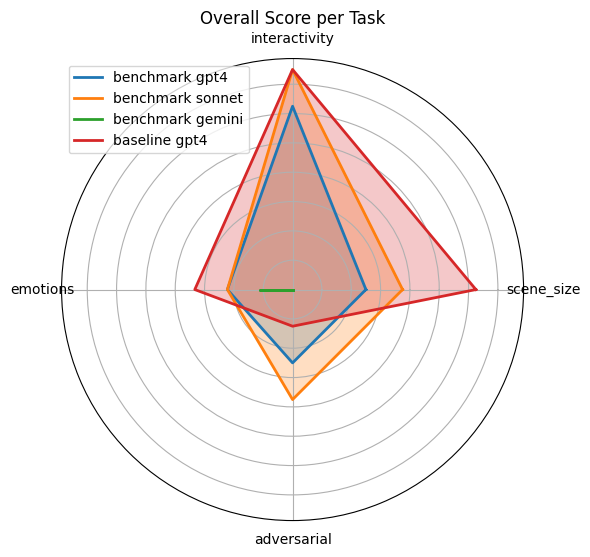

In [5]:
star_plot(x="task", y="score", hue="llm", data=score_df)
plt.title("Overall Score per Task")